In [12]:
import json
import pymongo
import certifi
import pandas as pd
from matplotlib import plt as plt
from matplotlib.ticker import FormatStrFormatter

In [8]:
# Retrieve credentials
with open("/Users/tiffanivick/Desktop/credentials.json") as f:
  data = json.load(f)
  mongo_connection_string = data ['mongodb']
  
# Fetch the database named "DB1"
client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())
db1_database = client['DB1']
metacritic_data = db1_database['metacritic_new_2']
metacritic = pd.DataFrame(metacritic_data.find())

In [10]:
# Convert release dates into actual dates and gather year/month
metacritic.release_date = pd.to_datetime(metacritic.release_date)
metacritic['year'] = metacritic.release_date.dt.year
metacritic['month'] = metacritic.release_date.dt.month
metacritic.score = pd.to_numeric(metacritic.score)
metacritic.head()

,_id,movie_id,title,release_date,description,score,thumbnail,year,month
0,6365b284f479801c9e932cb5,11234,"Crouching Tiger, Hidden Dragon",2000-12-08,"In 19th century China, a magical sword given b...",94,https://static.metacritic.com/images/products/...,2000,12
1,6365b284f479801c9e932cb6,11235,Yi Yi,2000-10-06,This film portrays life through portraits of t...,93,https://static.metacritic.com/images/products/...,2000,10
2,6365b284f479801c9e932cb7,11236,Beau Travail,2000-03-31,The soldiers of a small French Foreign Legion ...,91,https://static.metacritic.com/images/products/...,2000,3
3,6365b284f479801c9e932cb8,11237,Almost Famous,2000-09-13,"In the 1970's, a high school boy (Fugit) is gi...",90,https://static.metacritic.com/images/products/...,2000,9
4,6365b284f479801c9e932cb9,11238,Chicken Run,2000-06-21,A claymation spoof of classic prison-camp flic...,88,https://static.metacritic.com/images/products/...,2000,6


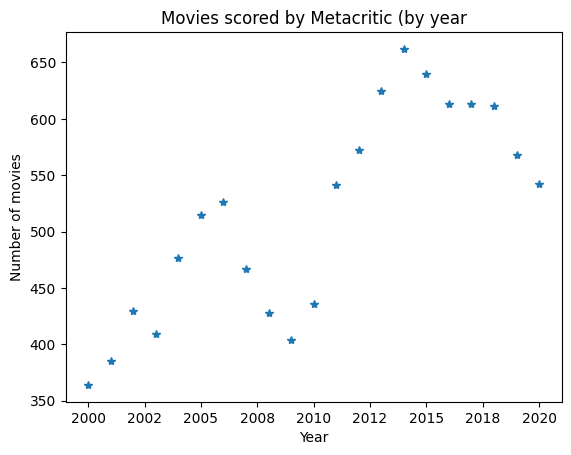

In [40]:
# Set up labels on the axes
plt.title('Movies scored by Metacritic (by year')
plt.xlabel('Year')
plt.ylabel('Number of movies')

# Count movies measured by metacritic by year and plot the results
df = metacritic['release_date'].groupby(metacritic.year).agg('count')
plt.plot(df, '*')
# Prevent matplotlib from rendering years with decimals
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.show()

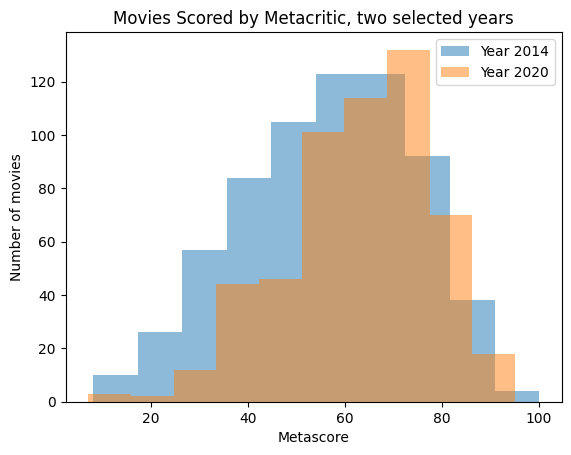

In [15]:
# Retrieve metascore for two different years
scores_2014 = metacritic[metacritic['year'] == 2014].score
scores_2020 = metacritic[metacritic['year'] == 2020].score

# Plot into buckets
plt.title('Movies Scored by Metacritic, two selected years')
plt.xlabel('Metascore')
plt.ylabel('Number of movies')
plt.hist(scores_2014, alpha=0.5, label='Year 2014')
plt.hist(scores_2020, alpha=0.5, label='Year 2020')
plt.legend(loc='upper right')
plt.show()

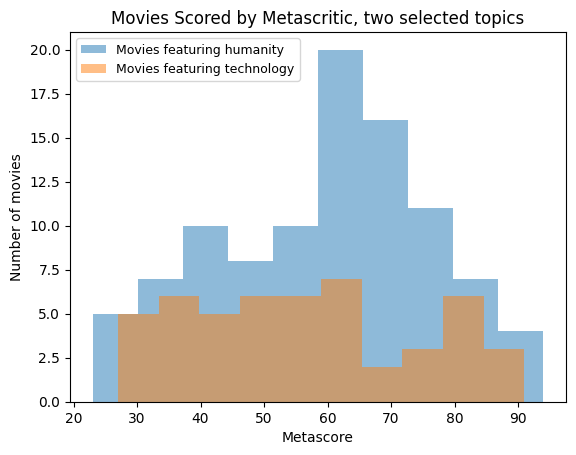

In [38]:
# Retrieve metascores for two different topics
scores_technology = metacritic[metacritic['description'].str.contains('technology')].score
scores_humanity = metacritic[metacritic['description'].str.contains('humanity')].score

# Plot into buckets
plt.title('Movies Scored by Metascritic, two selected topics')
plt.xlabel('Metascore')
plt.ylabel('Number of movies')
plt.hist(scores_humanity, alpha=0.5, label='Movies featuring humanity')
plt.hist(scores_technology, alpha=0.5, label='Movies featuring technology')
plt.legend(loc='best', fontsize=9)
plt.show()

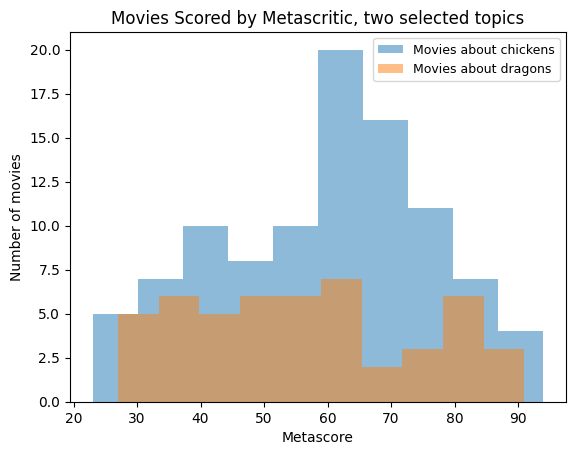

In [39]:
# Retrieve metascores for two different topics
scores_chicken = metacritic[metacritic['title'].str.contains('chicken')].score
scores_dragon = metacritic[metacritic['title'].str.contains('dragon')].score

# Plot into buckets
plt.title('Movies Scored by Metascritic, two selected topics')
plt.xlabel('Metascore')
plt.ylabel('Number of movies')
plt.hist(scores_humanity, alpha=0.5, label='Movies about chickens')
plt.hist(scores_technology, alpha=0.5, label='Movies about dragons')
plt.legend(loc='best', fontsize=9)
plt.show()